# ch 7. word2vec

## word2vec
앞서 tfidf, naive bayes 모델은 단순히 문서 내에서 토큰이 등장한 여부와 빈도 수를 세었습니다. 때문에 토큰의 앞, 뒤에 어느 토큰이 오는지 맥락을 고려하지 못합니다. 그리고 어떤 토큰이 서로 비슷한지 알 지 못합니다. 이러한 한계를 극복하고, 토큰이 갖는 의미를 학습하기 위해 고안된 모델이 딥러닝을 활용한 word2vec입니다. 그리고 이 방법이 효과적이어서 이후에 딥러닝을 이용한 NLP가 꽃피우는 시발점이 됩니다.

word2vec 모델에서는 토큰 별로 의미를 AI 모델에 학습시키기 단어 별로 임베딩 벡터에 매핑 시킵니다. 아래 예시에서 "cat"이라는 토큰을 [0, 0, 1, 0, 0, 0]이라는 one-hot 벡터로 표현할 수 있었습니다. 이 one-hot vector를 보고 Wvm으로 표기된 embedding layer에서 "cat" 토큰에 해당하는 임베딩 벡터를 찾습니다. 이 과정을 look up이라고 표현합니다.

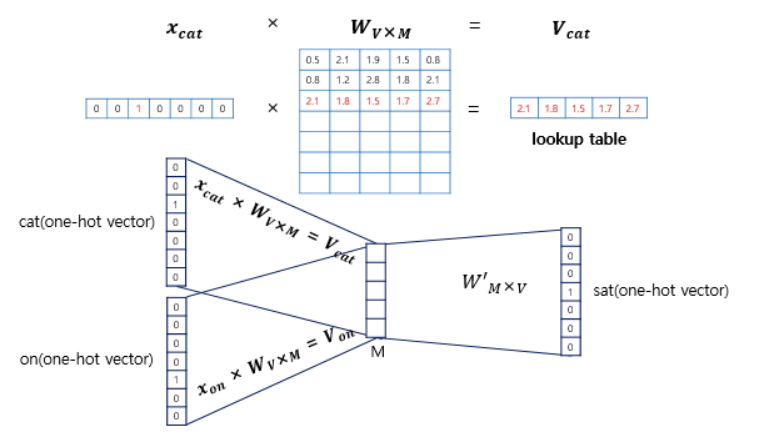

이렇게 찾은 임베딩 벡터를 이용해서 딥러닝 모델을 학습시킵니다. 딥러닝 시간에 배우겠지만, 딥러닝 모델을 학습시키기 위해서는 모델을 이용해서 특정 테스크를 수행하고, 잘했는지 못했는지 결과를 평가하여 성능을 개선하도록 학습이 진행됩니다. word2vec 모델을 학습시키기 위해선 2가지 테스크를 사용할 수 있습니다.

1. CBOW 
2. SKIP GRAM 

### CBOW 방식
CBOW는 주변 단어들의 임베딩 벡터를 가지고 중간에 들어갈 단어를 예측하는 테스크입니다. 
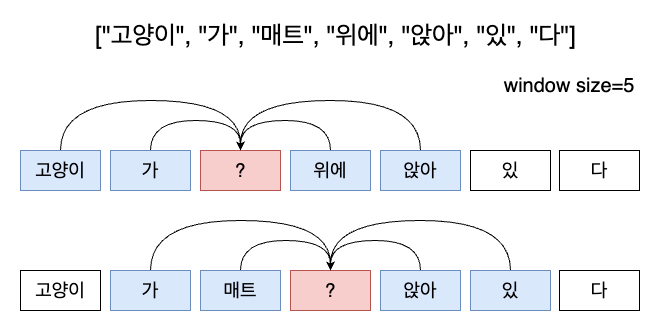

### SKIP GRAM 방식
skip gram은 이와 반대로 중심에 오는 단어를 가지고 주변 단어들을 예측하는 테스크를 말합니다. 직관적으로는 CBOW가 더 말이 되는 테스크 같지만, 실제 실험 결과로는 SKIP GRAM 테스크가 더 잘 작동한다고 합니다.
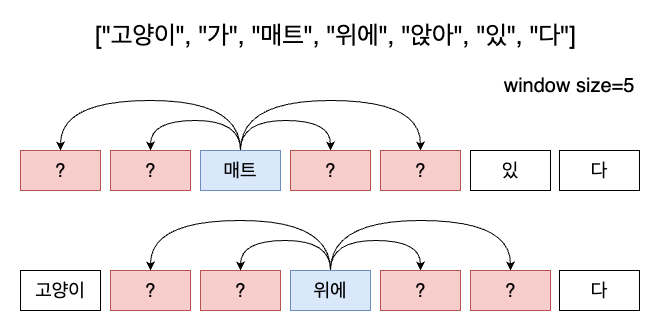

딥러닝 모델을 이용해서 어떻게 예측을 하는지, 예측 결과의 정확도는 어떻게 평가하는지, 평가 결과를 가지고 모델을 어떻게 학습시키는 지와 관련된 내용들은 딥러닝 시간에 다루도록 하겠습니다.

### word2vec 모델의 효과
word2vec이 결국 학습하게 되는건 특정 단어가 주어졌을 때, 주변에 어떤 단어가 오는지 입니다. 즉, 특정 단어의 임베딩 벡터에는 주변에 어떤 단어가 등장하는지에 대한 정보가 담겨져 있습니다. 때문에 이러한 벡터를 "embedding vector"라고 부릅니다.

단어를 벡터로 표현하게 되면 여러가지 신기한 작업들이 가능해집니다. 가령 "고양이"와 가장 유사한 단어를 찾는다면, 고양이의 임베딩 벡터와 가장 거리가 비슷한 벡터를 찾으면 됩니다. 그 결과 "강아지" 등의 단어가 리턴될 수 있습니다.

벡터들 간의 덧셈, 뺄셈도 가능해집니다. 가령, "한국" 이라는 단어의 임베딩 벡터에서 "서울"을 빼주고, "도쿄"를 더해준 뒤, 이 벡터와 가장 유사한 벡터를 찾으면 "일본"이 리턴됩니다.

이 외에도 감정 분류, 개체명 인식, 텍스트 생성과 같은 테스크들도 모두 단어를 벡터로 표현하는 것에서 출발합니다. 이번 챕터에서는 단어를 벡터로 표현한다는 것이 무슨 의미인지 확실하게 익히고 넘어가면 충분합니다.

## Gensim을 이용한 word2vec 모델 학습
물론 pytorch를 이용해서 word2vec 모델을 직접 구현할 수 있습니다만, 여기서는 gensim 라이브러리를 사용해서 word2vec 모델을 학습시켜보겠습니다. 

In [1]:
!pip install gensim


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### 데이터 셋 준비

2022년 야구 기사 1만개를 샘플링한 데이터 셋을 불러와서 기사 본문을 토큰화 한 컬럼을 가져옵니다.

### gensim word2vec 학습

gensim 라이브러리에 내장되어 있는 word2vec 클래스를 이용하여 모델을 학습시킵니다. 학습 과정을 모니터링 하기 위해서 CallbackAny2Vec 클래스를 상속 받은 MonitorCallback 클래스를 하나 작성하겠습니다.

### 단어별 임베딩 벡터

학습된 word2vec 모델을 이용하면 특정 단어의 embedding vector를 가져올 수 있습니다.

### 유사한 단어 찾기

tf-idf를 이용하여 벡터화 한 문서끼리 유사도를 비교하여 비슷한 문서를 가져왔던 예제를 기억하실 겁니다. word2vec 모델을 이용해서 얻은 벡터끼리도 당연히 유사도를 비교하여 가장 유사한 단어를 가져올 수 있습니다. 이 때, gensim word2vec 모델에 내장된 most_similar 함수를 사용합니다.

### 임베딩 벡터끼리 더하고 빼기

word2vec 모델이 세상을 놀라게 했던 가장 큰 특징은 단어 임베딩 벡터끼리 더하고 뺄 수 있다는 점입니다.

$$\text{"키움"}-\text{"이정후"}=\text{"SSG"}-\text{"추신수"}$$

위 수식에서 추신수만 좌편으로 옮겨보겠습니다. 

$$\text{"추신수"}+\text{"키움"}-\text{"이정후"}=\text{"SSG"}$$

과연 "추신수" + "키움" - "이정후" = "SSG"가 나올지 학습된 word2vec 모델을 이용해서 알아보겠습니다. most_similar 함수에 더하고자하는 단어들과 빼고자 하는 단어를 파라미터로 전달해보겠습니다.

의도한 대로 SSG가 리턴되었습니다. 즉, word2vec으로 학습시킨 단어의 임베딩 벡터는 단어의 의미를 담고 있다고 볼 수 있습니다.

### word2vec 모델 저장

학습시킨 word2vec 모델은 나중에 재사용하기 위해 저장하겠습니다.

## 정리

이번 챕터에서는 word2vec 모델을 살펴보았습니다. 그리고 gensim 라이브러리를 사용하여 word2vec 모델을 학습시켜보고, 단어의 임베딩 벡터를 이용하여 유사한 단어를 찾거나 서로 더하고 빼는 실습을 진행해보았습니다. 이를 통해서 word2vec 임베딩 벡터가 단어의 의미를 담고 있다는 것을 알게 되었습니다.

다음 챕터에서는 차원 축소 기법을 이용하여 단어의 임베딩 벡터의 차원을 축소한 뒤, 이를 좌표 평면에 시각화 해보겠습니다. 